In [4]:
BASE_DIR = '../'*3
MLPMODEL = BASE_DIR +'code/MLP/MLP_MODEL/mlp_model.ipynb'
PREPRO = BASE_DIR + 'code/UTIL/dataset/office31_prepro.ipynb'
%run {MLPMODEL}
%run {PREPRO}

Using device: cuda
NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.1 GB
Using PyTorch version: 2.4.1+cu124


In [5]:
EPOCH = 50
BATCH_SIZE=20
NUM_WORKERS=8
LEARNING_RATE = 0.0001

Model office31_model_1 train started 


None
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layers): Sequential(
    (0): Linear(in_features=30000, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=34, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
    Epoch 10: cost=3.566, accuracy=0.808+0.155/0.790+0.140 (14/14 secs)
    Epoch 20: cost=3.304, accuracy=0.836+0.216/0.770+0.200 (14/28 secs)
    Epoch 30: cost=3.147, accuracy=0.847+0.241/0.810+0.270 (14/42 secs)
    Epoch 40: cost=3.034, accuracy=0.862+0.265/0.880+0.220 (13/55 secs)
    Epoch 50: cost=2.958, accuracy=0.862+0.287/0.820+0.320 (14/69 secs)
Model office31_model_1 train 

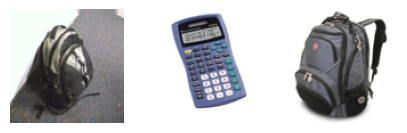

[ 도메인 추정결과 ]
추정확률분포 [ 3, 7,90] => 추정 webcam : 정답 webcam => O
추정확률분포 [100, 0, 0] => 추정 amazon : 정답 amazon => O
추정확률분포 [97, 1, 2] => 추정 amazon : 정답 amazon => O
[ 상품 추정결과 ]
추정확률분포 [54, 2, 0, 3, 3, 5, 0, 1,...] => 추정 back_pack : 정답 back_pack => O
추정확률분포 [ 1, 0, 0,12, 2, 3,22, 2,...] => 추정 desk_chair : 정답 calculator => X
추정확률분포 [68, 0, 0, 1, 0, 0, 0, 0,...] => 추정 back_pack : 정답 back_pack => O


In [6]:
od = Office31Dataset()
om1 = Mlp_Torch('office31_model_1', od, [64,32,10])
om1.exec_all(epoch_count=EPOCH, report=10,batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS)
# SGD

Model office31_model_1 train started 


None
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layers): Sequential(
    (0): Linear(in_features=30000, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=34, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
    Epoch 10: cost=3.060, accuracy=0.850+0.258/0.790+0.160 (14/14 secs)
    Epoch 20: cost=2.850, accuracy=0.860+0.316/0.850+0.300 (14/28 secs)
    Epoch 30: cost=2.546, accuracy=0.879+0.365/0.830+0.350 (13/41 secs)
    Epoch 40: cost=2.419, accuracy=0.896+0.380/0.820+0.320 (13/54 secs)
    Epoch 50: cost=2.196, accuracy=0.911+0.431/0.840+0.370 (13/67 secs)
M

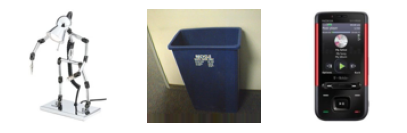

[ 도메인 추정결과 ]
추정확률분포 [75, 1,24] => 추정 amazon : 정답 amazon => O
추정확률분포 [ 0,23,77] => 추정 webcam : 정답 webcam => O
추정확률분포 [100, 0, 0] => 추정 amazon : 정답 amazon => O
[ 상품 추정결과 ]
추정확률분포 [ 1, 0, 1, 6, 6, 6, 0, 8,...] => 추정 pen : 정답 desk_lamp => X
추정확률분포 [45, 3, 0, 7, 0, 0,27, 2,...] => 추정 back_pack : 정답 trash_can => X
추정확률분포 [ 0, 0, 0, 0, 0,18, 0, 0,...] => 추정 mobile_phone : 정답 mobile_phone => O


In [7]:
om2 = Mlp_Torch('office31_model_1', od, [64,32,10])
om2.use_adam = True
om2.exec_all(epoch_count=EPOCH, report=10,batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS)
# Adam